In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [2]:
#Set the paths to your dataset
base_path = 'sitting-standing-dataset-images'
train_csv_path = os.path.join(base_path, 'train', '_annotations.csv')
train_img_path = os.path.join(base_path, 'train')


In [3]:
# Load and preprocess the data
def load_data(csv_path, img_path):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    for idx, row in df.iterrows():
        img = load_img(os.path.join(img_path, row['filename']), target_size=(224, 224))
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(row['class'])
    return np.array(X), np.array(y)

X, y = load_data(train_csv_path, train_img_path)


In [4]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [6]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/Users/shreyuu/VS_Code_projects/learning/python/ml-models/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-25 10:35:03.520980: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-25 10:35:03.521355: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-09-25 10:35:03.522109: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-09-25 10:35:03.522157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-25 10:35:03.522341: I tensorflow/core/common_runtime/pluggable

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [27]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


2024-09-25 09:28:26.704241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/shreyuu/VS_Code_projects/learning/python/machine-learning/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ━━━━━━━━━━━━━━━━━━━━ 182s 596ms/step - accuracy: 0.7900 - loss: 0.5376 - val_accuracy: 0.8099 - val_loss: 0.4805
Epoch 2/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 2:03 417ms/step - accuracy: 0.8438 - loss: 0.4534

2024-09-25 09:31:29.054283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_12/_38]]
2024-09-25 09:31:29.054530: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:31:29.054738: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1560529067010648116
2024-09-25 09:31:29.054752: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15834377152824682944
2024-09-25 09:31:29.054758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:31:29.054780: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10698019651

297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8438 - loss: 0.4534 - val_accuracy: 0.8099 - val_loss: 0.4810
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 119s 392ms/step - accuracy: 0.7968 - loss: 0.5012 - val_accuracy: 0.8099 - val_loss: 0.4358
Epoch 4/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 57s 194ms/step - accuracy: 0.7500 - loss: 0.4725

2024-09-25 09:33:34.981108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:33:34.981209: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11582447437814797878
2024-09-25 09:33:34.981250: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:33:34.981272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_18/_44]]
2024-09-25 09:33:34.981279: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2884915167084918414
2024-09-25 09:33:34.981305: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11094658110

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7500 - loss: 0.4725 - val_accuracy: 0.8099 - val_loss: 0.4332
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 75s 248ms/step - accuracy: 0.8005 - loss: 0.4721 - val_accuracy: 0.8099 - val_loss: 0.4287
Epoch 6/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - accuracy: 0.8125 - loss: 0.4843

2024-09-25 09:34:54.509101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:34:54.509170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_12/_38]]
2024-09-25 09:34:54.509203: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:34:54.509215: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1560529067010648116
2024-09-25 09:34:54.509222: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15834377152824682944
2024-09-25 09:34:54.509237: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 68212183063

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8125 - loss: 0.4843 - val_accuracy: 0.8099 - val_loss: 0.4282
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 75s 246ms/step - accuracy: 0.8091 - loss: 0.4492 - val_accuracy: 0.8099 - val_loss: 0.4107
Epoch 8/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:06 225ms/step - accuracy: 0.7500 - loss: 0.5070

2024-09-25 09:36:13.000382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_8/_46]]
2024-09-25 09:36:13.000418: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:36:13.000426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:36:13.000447: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2884915167084918414
2024-09-25 09:36:13.000459: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12415848092900958051
2024-09-25 09:36:13.000463: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 110946581100

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7500 - loss: 0.5070 - val_accuracy: 0.8099 - val_loss: 0.4104
Epoch 9/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 68s 222ms/step - accuracy: 0.8088 - loss: 0.4453 - val_accuracy: 0.8099 - val_loss: 0.4168
Epoch 10/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:04 218ms/step - accuracy: 0.8125 - loss: 0.4109

2024-09-25 09:37:24.555853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:37:24.556464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_20/_34]]
2024-09-25 09:37:24.556472: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2884915167084918414
2024-09-25 09:37:24.556475: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14347080573091775447
2024-09-25 09:37:24.556481: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:37:24.556488: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10663277849

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8125 - loss: 0.4109 - val_accuracy: 0.8099 - val_loss: 0.4229
Epoch 11/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 78s 255ms/step - accuracy: 0.8159 - loss: 0.4229 - val_accuracy: 0.8338 - val_loss: 0.4065
Epoch 12/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:02 213ms/step - accuracy: 0.7188 - loss: 0.7584

2024-09-25 09:38:45.976239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:38:45.978202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_2/_52]]
2024-09-25 09:38:45.980098: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14347080573091775447
2024-09-25 09:38:45.980119: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10663277849875162337
2024-09-25 09:38:45.980133: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16614456450761459169
2024-09-25 09:38:45.980143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15684188

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7188 - loss: 0.7584 - val_accuracy: 0.8338 - val_loss: 0.3984
Epoch 13/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 131s 433ms/step - accuracy: 0.8226 - loss: 0.4137 - val_accuracy: 0.8338 - val_loss: 0.4125
Epoch 14/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:15 255ms/step - accuracy: 0.8438 - loss: 0.3944

2024-09-25 09:41:01.166513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:41:01.166689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_8/_46]]
2024-09-25 09:41:01.166724: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:41:01.166826: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10698019651291057245
2024-09-25 09:41:01.166927: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14347080573091775447
2024-09-25 09:41:01.166960: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 28849151670

297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8438 - loss: 0.3944 - val_accuracy: 0.8334 - val_loss: 0.3969
Epoch 15/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 94s 308ms/step - accuracy: 0.8212 - loss: 0.4068 - val_accuracy: 0.8342 - val_loss: 0.3756
Epoch 16/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:02 213ms/step - accuracy: 0.8125 - loss: 0.3660

2024-09-25 09:42:40.534486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_31]]
2024-09-25 09:42:40.534544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:42:40.536445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:42:40.536518: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2884915167084918414
2024-09-25 09:42:40.536548: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11094658110024087398
2024-09-25 09:42:40.536551: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10698019651291057245
2024-09-25

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8125 - loss: 0.3660 - val_accuracy: 0.8338 - val_loss: 0.3776
Epoch 17/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.8285 - loss: 0.4041 - val_accuracy: 0.8338 - val_loss: 0.3660
Epoch 18/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 1:01 207ms/step - accuracy: 0.8750 - loss: 0.2813

2024-09-25 09:44:06.328944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:44:06.330909: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2884915167084918414
2024-09-25 09:44:06.330965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-09-25 09:44:06.330989: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9854840171313200165
2024-09-25 09:44:06.330998: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:44:06.331023: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11582447437814797878
2024-09-25 

297/297 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8750 - loss: 0.2813 - val_accuracy: 0.8342 - val_loss: 0.3707
Epoch 19/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 77s 253ms/step - accuracy: 0.8192 - loss: 0.4043 - val_accuracy: 0.8330 - val_loss: 0.3695
Epoch 20/20
  1/297 ━━━━━━━━━━━━━━━━━━━━ 54s 185ms/step - accuracy: 0.8438 - loss: 0.3156

2024-09-25 09:45:26.441402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/Add/ReadVariableOp/_23]]
2024-09-25 09:45:26.442131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-25 09:45:26.442751: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11546042070787308
2024-09-25 09:45:26.442758: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1560529067010648116
2024-09-25 09:45:26.442763: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5120476224709304105
2024-09-25 09:45:26.442769: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item can

297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8438 - loss: 0.3156 - val_accuracy: 0.8330 - val_loss: 0.3768


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

75/75 - 8s - 101ms/step - accuracy: 0.8330 - loss: 0.3768

Test accuracy: 0.8329836130142212


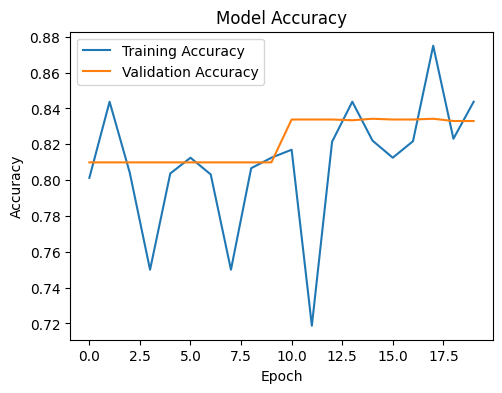

In [29]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

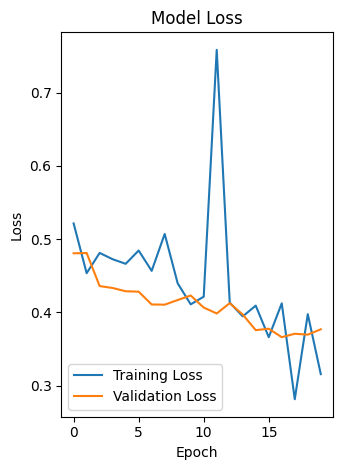

In [30]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
# Function to predict on new images
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    
    prediction = model.predict(img_array)
    predicted_class = le.inverse_transform([np.argmax(prediction)])[0]
    
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {np.max(prediction):.2f}")


In [42]:
# Example usage:
# predict_image('path_to_new_image.jpg')
predict_image('sitting-standing-dataset-images/train/000127_jpg.rf.f340495dc664cbbeeea7ad5cb238c523.jpg')

# class 0:- sitting
# class 1:- standing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: 0
Confidence: 0.99
